In [1]:
# David Bassen, April 2022
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
from plotnine import *
%config InlineBackend.figure_format ='retina' # makes plots look nicer on high res displays (e.g. Apple Retina)

# TI plot box/reactangle demo
This demo shows how to overlay shaded boxes onto a plot and add text.

In [2]:
# Define artificial simulation results
n_rows = 100 # per dose
times = np.linspace(start=0, stop=15, num=n_rows)
f = lambda x: -x**2 + 5*x + 0.5
results = pd.DataFrame({
    't_days': times.tolist()+times.tolist(),
    'value':  f(times).tolist() + (np.array(f(times))*0.5).tolist(),
    'output': ['ti']*n_rows*2,
    'dose_mpk': ['1']*n_rows+ ['0.5']*n_rows
})

display(results)

,t_days,value,output,dose_mpk
0,0.000000,0.500000,ti,1
1,0.151515,1.234619,ti,1
2,0.303030,1.923324,ti,1
3,0.454545,2.566116,ti,1
4,0.606061,3.162994,ti,1
...,...,...,...,...
195,14.393939,-67.357897,ti,0.5
196,14.545455,-69.171488,ti,0.5
197,14.696970,-71.008035,ti,0.5
198,14.848485,-72.867539,ti,0.5


/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning: geom_path: Removed 66 rows containing missing values.


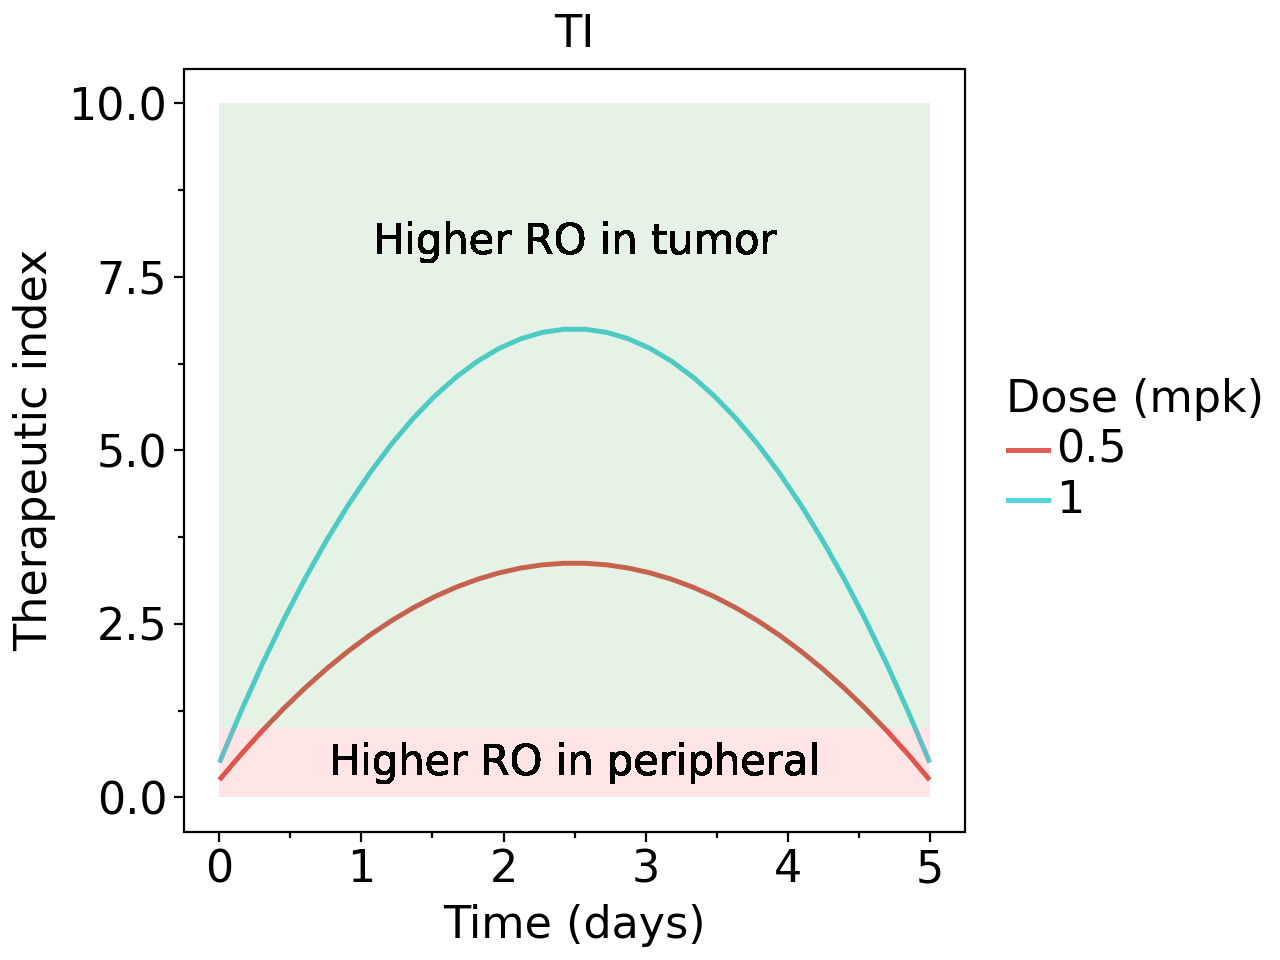

In [3]:
(ggplot(results, aes(x='t_days', y='value',color='dose_mpk'))
    + geom_line(size=1)
     + xlim(0,5)
   + ylim(0,10)
    + labs(title='TI',
           x='Time (days)',
           y='Therapeutic index',
           color = 'Dose (mpk)')
+ theme_matplotlib()
+theme(text=element_text(size=16))
 # label TI < 1
 + annotate(geom_rect, ymin=0, ymax=1, xmin=0, xmax=5, alpha=.1, fill="red")
 + geom_text(x=2.5,y=0.5,label="Higher RO in peripheral",color = 'black',size=15)
 # label TI > 1
 + annotate(geom_rect, ymin=1, ymax=10, xmin=0, xmax=5, alpha=.1, fill="green")
 + geom_text(x=2.5,y=8,label="Higher RO in tumor",color = 'black',size=15)
)# color controls outline of the box